In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
#imports for keras layers
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, ZeroPadding2D
from keras.optimizers import SGD

Using TensorFlow backend.


In [3]:
train,test = keras.datasets.mnist.load_data()

Sample images: 


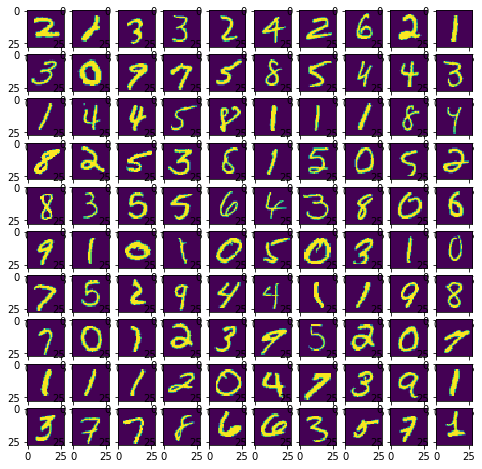

In [4]:
fig = plt.figure(figsize=(8,8))
rows = 10
cols = 10

for i in range(100):
        fig.add_subplot(rows, cols, i+1)
        image = random.choice(train[0])
        plt.imshow(image)
print("Sample images: ")
plt.show()

In [5]:
#resize data
x_train = train[0].reshape(len(train[0]),-1)
y_train = train[1]
x_test = test[0].reshape(len(test[0]),-1)
y_test = test[1]
#takes in a y matrix and a size of one-hots,
# outputs converted matrix
def convert_to_onehot(y, size):
    y_out = []
    
    for item in y:
        new_row = np.zeros((size))
        new_row[item] = 1
        y_out.append(new_row)
    
    return np.asarray(y_out)
    
y_train = convert_to_onehot(y_train,10)
y_test = convert_to_onehot(y_test,10)

In [6]:
#define a neural network in keras
def build_model():
    main_input = Input(shape=((784,)))
    layer_1 = Dense(512, activation="relu")(main_input)
    d_1 = Dropout(.5)(layer_1)
    layer_2 = Dense(1024, activation="relu")(d_1)
    main_output = Dense(10, activation="softmax")(layer_2)
    model = Model(inputs=[main_input], outputs=[main_output])
    return model


In [7]:
model = build_model()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 937,482
Trainable params: 937,482
Non-trainable params: 0
_________________________________________________________________


In [8]:
#compile the model for training
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [9]:
#and fit
model.fit(x_train, y_train, epochs=10, batch_size=32)

W0105 17:56:08.124410 4533792192 deprecation_wrapper.py:119] From /Users/huntermccoy/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/10
60000/60000 [==============================] - 26s 434us/step - loss: 2.9700 - accuracy: 0.7707
Epoch 2/10
60000/60000 [==============================] - 33s 553us/step - loss: 1.0567 - accuracy: 0.7761
Epoch 3/10
60000/60000 [==============================] - 36s 594us/step - loss: 0.8592 - accuracy: 0.8020
Epoch 4/10
60000/60000 [==============================] - 36s 600us/step - loss: 0.5758 - accuracy: 0.8574
Epoch 5/10
60000/60000 [==============================] - 37s 616us/step - loss: 0.4813 - accuracy: 0.8798
Epoch 6/10
60000/60000 [==============================] - 35s 587us/step - loss: 0.4476 - accuracy: 0.8884
Epoch 7/10
60000/60000 [==============================] - 38s 634us/step - loss: 0.4258 - accuracy: 0.8959
Epoch 8/10
60000/60000 [==============================] - 37s 621us/step - loss: 0.3906 - accuracy: 0.9062
Epoch 9/10
60000/60000 [==============================] - 36s 596us/step - loss: 0.3585 - accuracy: 0.9103
Epoch 10/10
60000/60000 [============

In [10]:
y_hat = model.predict(x_test)

In [11]:
#test Classify accuracy
def test_classify(y_hat, y_test):
    count = 0
    right = 0
    for i in range(len(y_test)):
        if np.argmax(y_test[i]) == np.argmax(y_hat[i]):
            right+=1
        count += 1
    return(right/count)

In [12]:
print(test_classify(y_hat, y_test))

0.9502


In [16]:
#don't like copying and pasting test_classify? do model.evaluate(x,y)
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 71us/step


[0.20335668570101262, 0.9502000212669373]